# Project 3 : Analyzing Angiotensin-converting enzyme (ACE) gene's association with SARS-CoV-2 infection in Asian community

 ### Scientific Question: What is the role of ACE gene in SARS-Cov-2 infection in asian community? 

Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) uses angiotensin-converting enzyme (ACE)-2 as a binding receptor to enter the cell. ACE2 plays a vital role in SARS-CoV-2 infection and pathogenesis. The binding and the subsequent cell entry of SARS-CoV-2 lead to exhaustion of ACE-2 and the reduced expression of cellular ACE-2. ACE share about 40% of sequence homology with ACE-2, and there is a counter-regulatory relationship between these two molecules. Studies have shown that ACE and ACE2 are interwoven and the administration of ACE inhibitors significantly increases the expression levels of ACE-2.



### Scientific Hypothesis: The hypothesis is that if polymorphism of ACE is introduced then this will decrease the SARS-CoV2 infection and pathogenesis 

Genetic polymorphism is a difference in DNA sequence among individuals, groups, or populations. In addition, an insertion/deletion polymorphism is a type of genetic variation in which a specific nucleotide sequence is present (insertion) or absent (deletion). With the insertion-deletion(I/D) polymorphism in ACE gene, it is found that the deletion (D) and insertion allele (I)  were associated with an elevated and diminished ACE level and enzyme activity, respectively. Previous studies have shown that deletion allele have resulted in elevated ACE level whereas insertion allele caused the decrease in ACE level respectively. The deletion and insertion allele are associated with an elevated and diminished ACE level and enzyme activity respectively. 

First, I had to find enough data to answer the scientific question and test the hypothesis of the project. I used PubMed to search few articles that have done similar research and picked one of them as a primary reference. The data table containing information of SARS-CoV-2 infected cases, related death, recovery rate as well as I/D genotype and allele information were accessed from a scientific paper (Abhijit Pati et.al, 2020). The data table was copied to a CSV file which was used to import all the necessary information required to generate the scatter plot. Similar to the referenced paper, Spearman rank correlation analysis was chosen as a bioinformatics method for data analysis. 

The downloaded CSV file has 12 columns with following column and 5 out 12 column was used for analysis in this project. The information from CSV file that was used for Project 3 are:

First column: Country name
Second column: SARS-CoV-2 infected cases per million of population in 26 Asian countries
Third column: SARS-CoV-2 related Deaths per million of population
Fourth column: Recovery Rate (%)
Twelfth column: Frequency of allele D (%)

### Importing Packages

**Pandas:** It is another Python library which is used for data manipulation and analysis. It is widely used in data structures and operations for manipulating numerical tables and time series. Pandas package was used to read the CSV file and import data from the file and create a panda series. 

**Scipy:** It is a Python library used for scientific computing and technical computing. It contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering. This package was used to perform Spearman rank correlation analysis

**Matplotlib:** It is a plotting library for the Python and its numerical mathematics extension of NumPy. Matplotlib package was used to create the scatter plot for the data visualization in this project. 

In [15]:
#Importing necessary packages
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 

### Loading Data

The data table containing information of SARS-CoV-2 infected cases, related death, recovery rate as well as I/D genotype and allele information were accessed from a scientific paper (Abhijit Pati et.al, 2020). The data table was downloaded as a CSV file and was imported in Jupyter notebook for analysis. In the paper, the data on COVID-19 infection rate (per million), mortality/million, and percentage of recovery were obtained form worldometer website. Asian countries with expenditure on health sector lower than 3% of their GDP were not included in this study. The genotypes distributions of ACE I/D polymorphism in all reports were screened for Hardy-Weinberg equilibrium (HWE), and the studies deviated from the HWE were excluded from the present investigation. HWE principle states that the genetic variation in a population will remain constant from one generation to the next in the absence of disturbing factors. 

In [23]:
#Creating a list of columns
col_list=["Country Name","SARS-CoV-2 infected Cases per million of population","SARS-CoV-2 related Deaths per million of population","Recovery Rate (%)","Number of Paper considered for prevalence of genotype investigation*","Total healthy controls (n)","I/I genotype (n)","I/D genotype (n)","D/D genotype (n)","I allele (n)","D allele (n)","Frequency of allele D (%)"]

#Reading csv file and using column list as filter between different columns
table=pd.read_csv("./SARS_Cov2.csv",usecols=col_list)


#Importing data from specific column of the CSV file and storing those data in a variable

#Stores information about SARS-Cov-2 infection in variable cases
cases=table["SARS-CoV-2 infected Cases per million of population"]
#Stores SARS-Cov-2 mortality information in variable mortality
mortality= table["SARS-CoV-2 related Deaths per million of population"]
#Stores recovery rate information in variable recovery
recovery=table["Recovery Rate (%)"]
#Stores Frequency of allele D (%) in variable mortality
percent_d_freq=table["Frequency of allele D (%)"]


### Statistical Analysis

#### Spearman rank correlation analysis: 

Spearman's correlation coefficient measures the strength and direction of association between two ranked variables.  Unlike Pearson'e coefficient, this method determines the strength and direction of the monotonic relationship between two variables rather than the strength and direction of the linear relationship between two variables. Spearman correlation coefficient (c), can take values from +1 to -1. A c of +1 indicates a perfect association of ranks, a c of zero indicates no association between ranks and a c of -1 indicates a perfect negative association of ranks. The closer c is to zero, the weaker the association between the ranks.

**Correlation coefficient (c):** 
- If c< 0 then we have decreasing Monotonic trend
- If c> 0 then we have increasing Monotonic trend
- If c= 0 then there is NO tendency of increasing or decreasing trend

**p-values:**
- If p-value< 0.05 then data is significant
- If p-value> 0.05 then data is in-significant


In [17]:
#Performing Spearman rank correlation analysis and assigning the correaltion coefficient and p-values to the variables
c,p=stats.spearmanr(cases,percent_d_freq)
c2,p2=stats.spearmanr(mortality,percent_d_freq)
c3,p3= stats.spearmanr(recovery,percent_d_freq)

#Prints the p-value and correlation coefficient from Spearman rank analysis for SRAS-CoV-2 infection cases
print('The p-value of the SARS-CoV-2 infection is: ' + str(p) + '.')
print('The Spearman rank correlation coefficient of SARS-CoV-2 infection is: ' + str(c) + '.')

#Prints the p-value and correlation coefficient from Spearman rank analysis for SRAS-CoV-2 mortality
print('The p-value of SARS-CoV-2 mortality is: ' + str(p2) + '.')
print('The Spearman rank correlation coefficient of SARS-CoV-2 mortality is: ' + str(c2) + '.')

#Prints the p-value and correlation coefficient from Spearman rank analysis for SRAS-CoV-2 recovery rate
print('The p-value of recovery rate is: ' + str(p3) + '.')
print('The Spearman rank correlation coefficient of recovery rate is: ' + str(c3) + '.')


The p-value of the SARS-CoV-2 infection is: 0.008936499498143775.
The Spearman rank correlation coefficient of SARS-CoV-2 infection is: 0.5022222222222221.
The p-value of SARS-CoV-2 mortality is: 0.010149071945828606.
The Spearman rank correlation coefficient of SARS-CoV-2 mortality is: 0.4949547427620645.
The p-value of recovery rate is: 0.13765810215474683.
The Spearman rank correlation coefficient of recovery rate is: -0.29914529914529914.


### Data visualization 

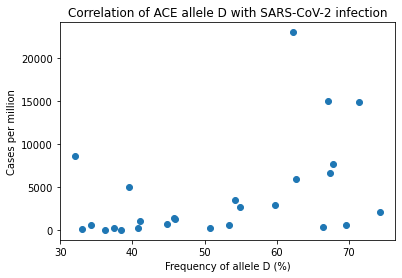

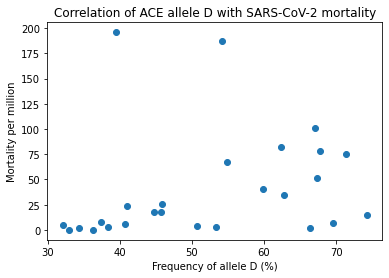

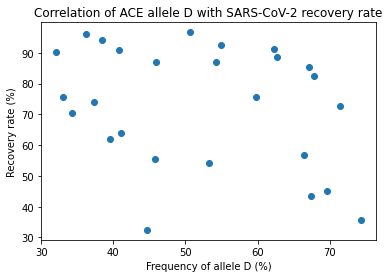

In [18]:
# Creating scatter plot for data visualization 
#Creates scatter plot for SARS-CoV-2 infection
plt.scatter(percent_d_freq, cases)
#Labels x-axis as 'Frequency of allele D (%)'
plt.xlabel('Frequency of allele D (%)')
#Labels y-axis as Cases per million
plt.ylabel('Cases per million')
#Provides title of the scatter plot
plt.title('Correlation of ACE allele D with SARS-CoV-2 infection')
#Displays the scatter plot
plt.show()

#Creates scatter plot for SARS-CoV-2 martality
plt.scatter(percent_d_freq, mortality)
#Labels x-axis as 'Frequency of allele D (%)'
plt.xlabel('Frequency of allele D (%)')
#Labels y-axis as Mortality per million
plt.ylabel('Mortality per million')
#Provides title of the scatter plot
plt.title('Correlation of ACE allele D with SARS-CoV-2 mortality')
#Displays the scatter plot
plt.show()

#Creates scatter plot for recovery rate
plt.scatter(percent_d_freq, recovery)
#Labels x-axis as 'Frequency of allele D (%)'
plt.xlabel('Frequency of allele D (%)')
#Labels y-axis as Recovery rate (%)
plt.ylabel('Recovery rate (%)')
#Provides title of the scatter plot
plt.title('Correlation of ACE allele D with SARS-CoV-2 recovery rate')
#Displays the scatter plot
plt.show()



### Infection rate Analysis

In [19]:

# Checking the monotonic trend of data using value of correlation coefficient
if c < 0 :
    correlation = 'DECREASING monotonic trend'
elif c == 0 :
    correlation = 'NO tendency of increasing or decreasing trend'
else :
    correlation = 'INCREASING monotonic trend'
    
print('The Spearman rank coefficient of SARS-CoV-2 infection shows ' + correlation +  '.')

#Checking the significance of the result using p-value
if p < 0.05 :
    signi = ' SIGNIFICANT'
else :
    signi = ' NOT SIGNIFICANT'
    
print('Since the p-value is ' + str(p) +'. The model is' + signi)
    
# Interpreting the result using the correlation coefficient and p-value in relation to the proposed hypothesis
if c < 0 and p < 0.05:
    result = ' SUPPORTS '
elif c>0 and p <0.05:
    result = 'SUPPORTS '
else :
    result= ' DOES NOT SUPPORT '
    
print('This outcome ' + result + 'the proposed hypothesis that the polymorphism of ACE is responsible in SARS-CoV2 infection. ')



The Spearman rank coefficient of SARS-CoV-2 infection shows INCREASING monotonic trend.
Since the p-value is 0.008936499498143775. The model is SIGNIFICANT
This outcome SUPPORTS the proposed hypothesis that the polymorphism of ACE is responsible in SARS-CoV2 infection. 


### Mortality rate Analysis

In [20]:

# Checking the monotonic trend of data using value of correlation coefficient
if c2 < 0 :
    correlation = 'DECREASING monotonic trend'
elif c2 == 0 :
    correlation = 'NO tendency of increasing or decreasing trend'
else :
    correlation = 'INCREASING monotonic trend'
    
print('The Spearman rank coefficient of the mortality rate shows ' + correlation +  '.')

#Checking the significance of the result using p-value
if p2 < 0.05 :
    signi = ' SIGNIFICANT'
else :
    signi = ' NOT SIGNIFICANT'
    
print('Since the p-value is ' + str(p2) +'. The model is' + signi)
    
# Interpreting the result using the correlation coefficient and p-value in relation to the proposed hypothesis
if c2 < 0 and p2 < 0.05:
    result = ' SUPPORTS '
elif c2>0 and p2 <0.05:
    result = 'SUPPORTS '
else :
    result= ' DOES NOT SUPPORT '
    
print('This outcome ' + result + 'the proposed hypothesis that the polymorphism of ACE is responsible in SARS-CoV2 in mortality. ')



The Spearman rank coefficient of the mortality rate shows INCREASING monotonic trend.
Since the p-value is 0.010149071945828606. The model is SIGNIFICANT
This outcome SUPPORTS the proposed hypothesis that the polymorphism of ACE is responsible in SARS-CoV2 in mortality. 


### Recovery rate Analysis

In [14]:

# Checking the monotonic trend of data using value of correlation coefficient
if c3 < 0 :
    correlation = 'DECREASING monotonic trend'
elif c3 == 0 :
    correlation = 'NO tendency of increasing or decreasing trend'
else :
    correlation = 'INCREASING monotonic trend'
    
print('The Spearman rank coefficient of recovery rate shows ' + correlation +  '.')

#Checking the significance of the result using p-value
if p3 < 0.05 :
    signi = ' SIGNIFICANT'
else :
    signi = ' NOT SIGNIFICANT'
    
print('Since the p-value is ' + str(p3) +'. The model is' + signi)
    
# Interpreting the result using the correlation coefficient and p-value in relation to the proposed hypothesis
if c3 < 0 and p3 < 0.05:
    result = ' SUPPORTS '
elif c3>0 and p3 <0.05:
    result = 'SUPPORTS '
else :
    result= ' DOES NOT SUPPORT '
    
print('This outcome' + result + 'the proposed hypothesis that the polymorphism of ACE is responsible in SARS-CoV2 infection and pathogenesis. ')



The Spearman rank coefficient of recovery rate shows DECREASING monotonic trend.
Since the p-value is 0.13765810215474683. The model is NOT SIGNIFICANT
This outcome DOES NOT SUPPORT the proposed hypothesis that the polymorphism of ACE is responsible in SARS-CoV2 infection and pathogenesis. 


## Conclusion

The Spearman rank coefficient (c) of infection and recovery rate shows an increasing monotonic trend (c>0) whereas mortality shows decreasing monotonic trend (c<0). When the significance of the model was analysed using p-value, SARS-CoV-2 infection and mortality has the p-value of 0.0089 and 0.010 respectively. These p-values are less than 0.05 and are considered significant whereas recovery rate model appears to be insignificant because p-value is greater than 0.05 (p-value=0.137). 
In this project, if the model indicated either increasing or decreasing monotonic trend with a significant p-value of less than 0.05 then a it was concluded that the model supports the hypothesis. After the analysis of trend line and p-value we can conclude that polymorphism of ACE gene contributes in SARS-CoV-2 infection and pathogenesis. 